In [41]:
# Dependencies
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import csv
import pingouin as pg
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import pearsonr
import scipy.stats  as stats

In [42]:
#Reading the CSV file 
df_l = pd.read_csv('LowPopularity_df_mean.csv')
df_l = df_l.drop(columns = 'Unnamed: 0')
df_l.head()

,Year,Acousticness,Danceability,Duration_Min,Energy,Explicit,Instrumentalness,Key,Liveness,Loudness,Popularity,Speechiness,Tempo,Valence
0,1920,0.640846,0.516549,3.938092,0.423214,0.120141,0.356752,4.706714,0.209104,-12.449703,0.0,0.086583,111.751064,0.502686
1,1921,0.872131,0.436558,3.908326,0.251645,0.079365,0.316502,5.261905,0.205060,-16.202675,0.0,0.080456,103.072683,0.410313
2,1922,0.828849,0.576345,2.331744,0.223814,0.000000,0.252804,4.865546,0.258060,-20.960563,0.0,0.467793,99.660378,0.576361
3,1923,0.932936,0.519702,2.789741,0.313604,0.000000,0.462729,4.619048,0.243057,-15.914131,0.0,0.103533,111.833821,0.635632
4,1924,0.942001,0.530802,3.197223,0.343132,0.000000,0.633596,5.484375,0.237116,-14.785089,0.0,0.096912,120.818297,0.648590


In [43]:
df_l.columns = df_l.columns.str.title()
df_l

,Year,Acousticness,Danceability,Duration_Min,Energy,Explicit,Instrumentalness,Key,Liveness,Loudness,Popularity,Speechiness,Tempo,Valence
0,1920,0.640846,0.516549,3.938092,0.423214,0.120141,0.356752,4.706714,0.209104,-12.449703,0.0,0.086583,111.751064,0.502686
1,1921,0.872131,0.436558,3.908326,0.251645,0.079365,0.316502,5.261905,0.205060,-16.202675,0.0,0.080456,103.072683,0.410313
2,1922,0.828849,0.576345,2.331744,0.223814,0.000000,0.252804,4.865546,0.258060,-20.960563,0.0,0.467793,99.660378,0.576361
3,1923,0.932936,0.519702,2.789741,0.313604,0.000000,0.462729,4.619048,0.243057,-15.914131,0.0,0.103533,111.833821,0.635632
4,1924,0.942001,0.530802,3.197223,0.343132,0.000000,0.633596,5.484375,0.237116,-14.785089,0.0,0.096912,120.818297,0.648590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2016,0.211349,0.589987,5.566056,0.643902,0.039872,0.453376,5.480064,0.195154,-9.662890,0.0,0.093800,124.878206,0.380728
97,2017,0.148548,0.572484,5.088291,0.727735,0.127874,0.381001,5.436782,0.217695,-8.378001,0.0,0.084080,123.772086,0.452951
98,2018,0.211362,0.585053,4.520345,0.683801,0.123249,0.372382,5.849673,0.241099,-9.085255,0.0,0.125817,123.913927,0.405655
99,2019,0.261473,0.566946,4.213946,0.624333,0.121643,0.403875,5.796209,0.214557,-10.030578,0.0,0.098020,124.586297,0.411188


In [44]:
df_l.drop(columns = ['Danceability','Duration_Min','Explicit','Liveness','Tempo','Valence'], inplace = True)
df_l

,Year,Acousticness,Energy,Instrumentalness,Key,Loudness,Popularity,Speechiness
0,1920,0.640846,0.423214,0.356752,4.706714,-12.449703,0.0,0.086583
1,1921,0.872131,0.251645,0.316502,5.261905,-16.202675,0.0,0.080456
2,1922,0.828849,0.223814,0.252804,4.865546,-20.960563,0.0,0.467793
3,1923,0.932936,0.313604,0.462729,4.619048,-15.914131,0.0,0.103533
4,1924,0.942001,0.343132,0.633596,5.484375,-14.785089,0.0,0.096912
...,...,...,...,...,...,...,...,...
96,2016,0.211349,0.643902,0.453376,5.480064,-9.662890,0.0,0.093800
97,2017,0.148548,0.727735,0.381001,5.436782,-8.378001,0.0,0.084080
98,2018,0.211362,0.683801,0.372382,5.849673,-9.085255,0.0,0.125817
99,2019,0.261473,0.624333,0.403875,5.796209,-10.030578,0.0,0.098020


In [45]:
column_list_l = df_l.columns[1:]
column_list_l

Index(['Acousticness', 'Energy', 'Instrumentalness', 'Key', 'Loudness',
       'Popularity', 'Speechiness'],
      dtype='object')

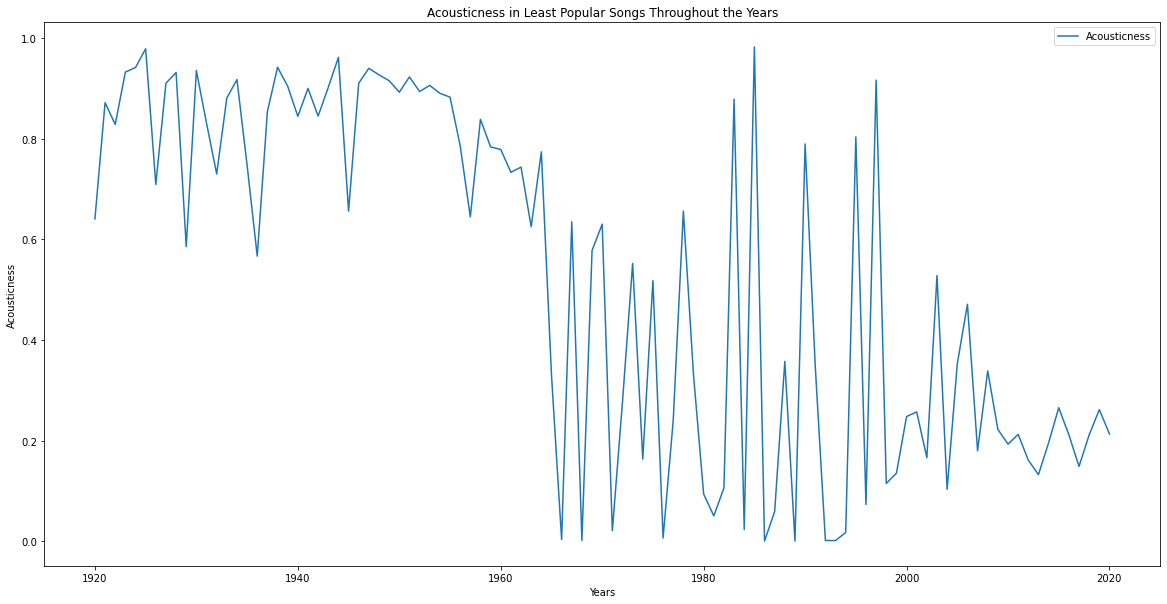

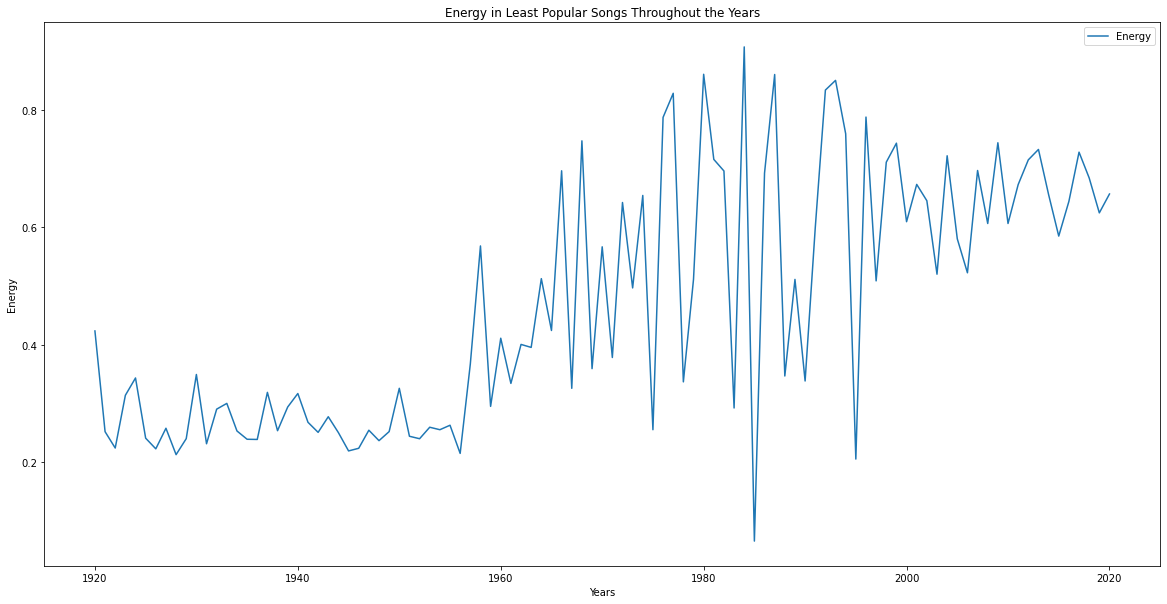

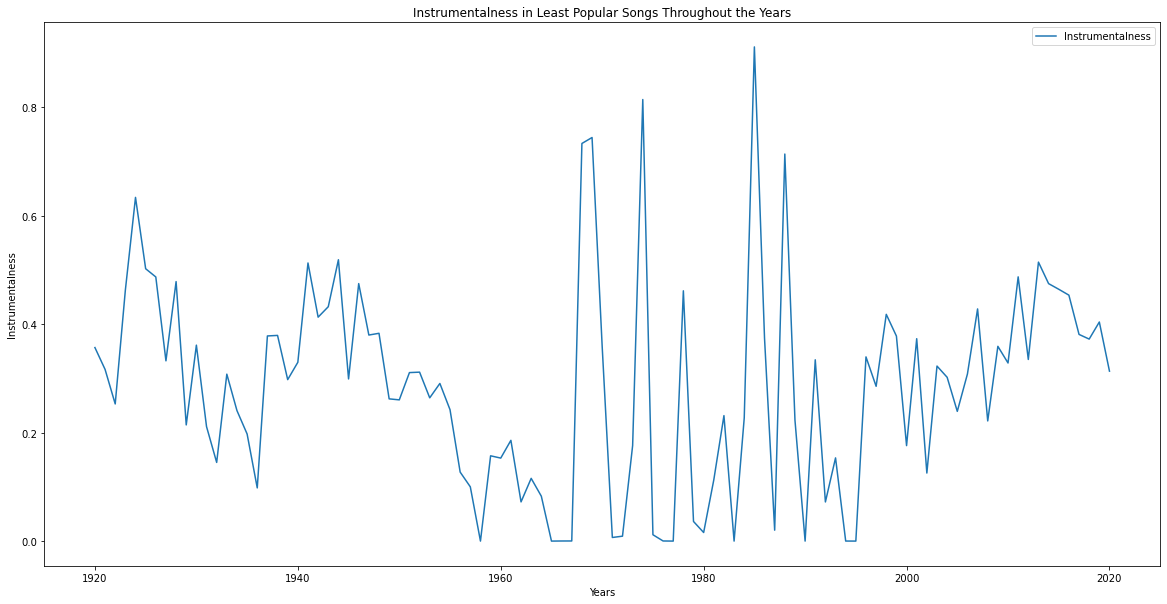

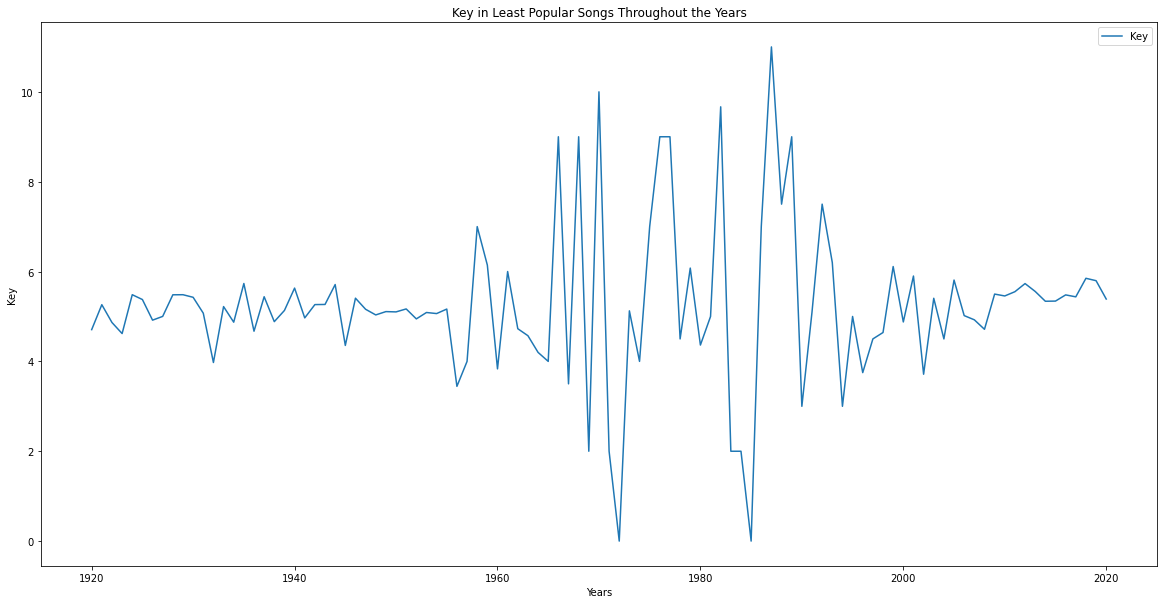

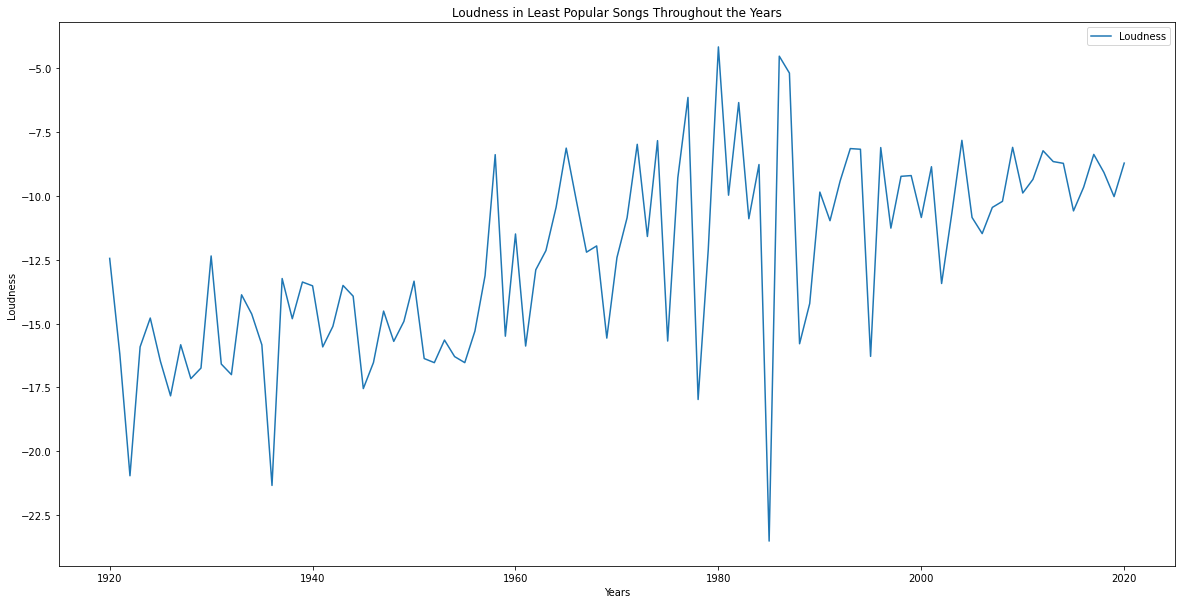

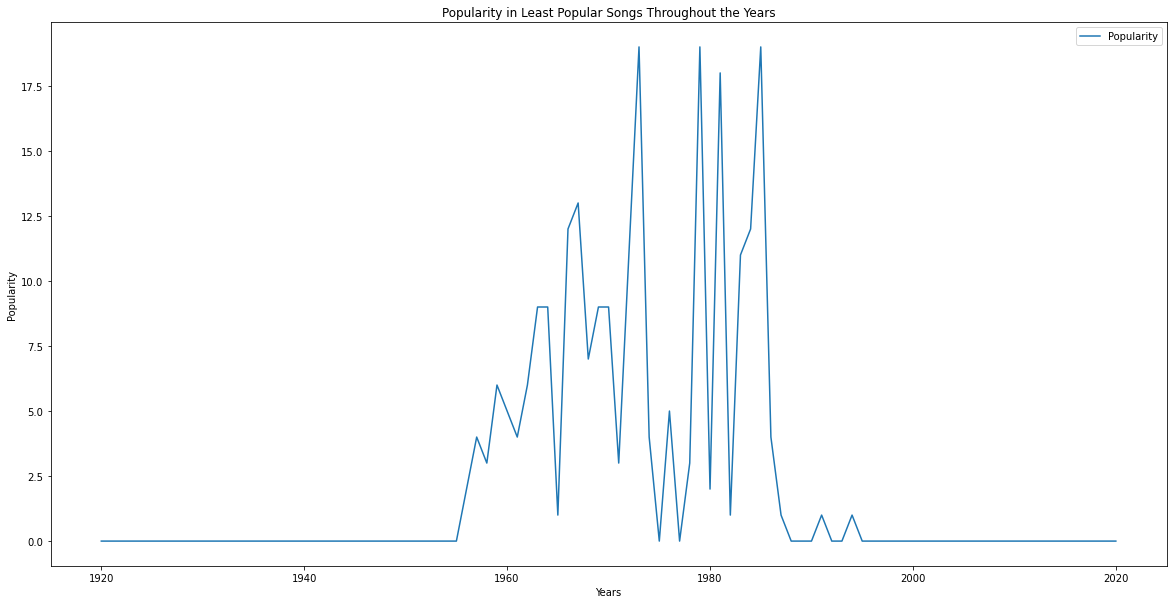

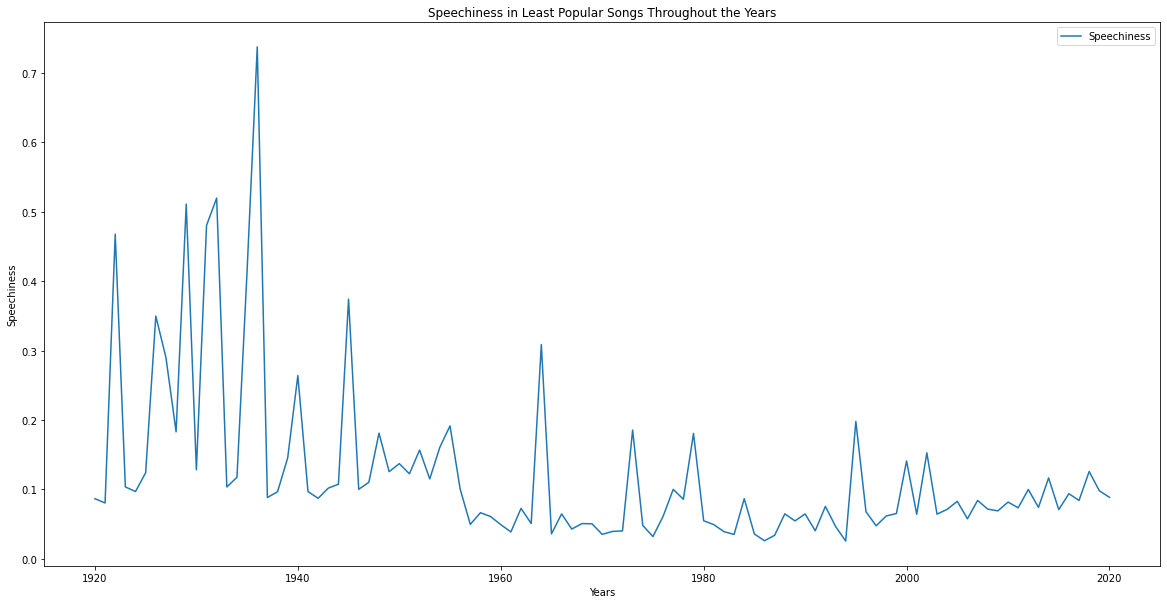

In [46]:
for i in column_list_l:
   
    df_l.plot(kind='line', x = 'Year', y = i, figsize=(20,10))
    plt.title(f'{i} in Least Popular Songs Throughout the Years')
    plt.xlabel('Years')
    plt.ylabel(i)
    
    plt.savefig(f"../Images/LowPopularity{i}overYears.png", facecolor = "w",bbox_inches="tight")
    
    plt.show();

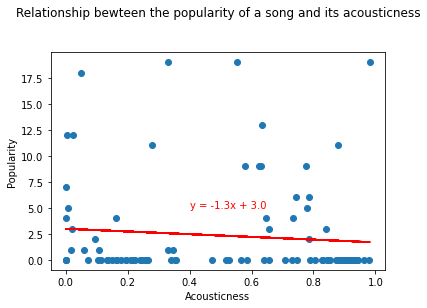

The r squared value is: 0.009306450726272668


In [29]:
#plot regression line for acousticness
x_axis = df_l['Acousticness']
y_axis = df_l['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(0.4, 5.0),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its acousticness\n\n")
plt.ylabel("Popularity")
plt.xlabel("Acousticness")

#save image
plt.savefig("../Images/LowPopularityandAcousticness.png", facecolor = "w",bbox_inches="tight")

plt.show();

print(f'The r squared value is: {rvalue**2}')

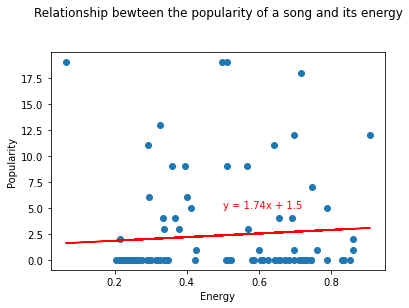

The r squared value is: 0.006354853854976041


In [30]:
#plot regression line for energy
x_axis = df_l['Energy']
y_axis = df_l['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(0.5, 5.0),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its energy\n\n")
plt.ylabel("Popularity")
plt.xlabel("Energy")

#save image
plt.savefig("../Images/LowPopularityandEnergy.png", facecolor = "w",bbox_inches="tight")

plt.show();

print(f'The r squared value is: {rvalue**2}')

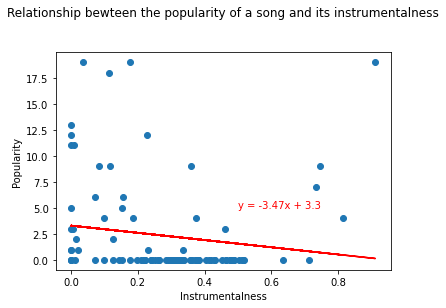

The r squared value is: 0.021231845956756718


In [31]:
#plot regression line for instrumentalness
x_axis = df_l['Instrumentalness']
y_axis = df_l['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(0.5, 5.0),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its instrumentalness\n\n")
plt.ylabel("Popularity")
plt.xlabel("Instrumentalness")

#save image
plt.savefig("../Images/LowPopularityandInstrumentalness.png", facecolor = "w",bbox_inches="tight")

plt.show();

print(f'The r squared value is: {rvalue**2}')

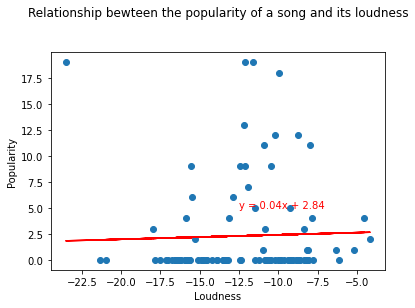

The r squared value is: 0.001185481559239956


In [32]:
#plot regression line for loudness
x_axis = df_l['Loudness']
y_axis = df_l['Popularity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(-12.5, 5.0),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its loudness\n\n")
plt.ylabel("Popularity")
plt.xlabel("Loudness")

#save image
plt.savefig("../Images/LowPopularityandloudness.png", facecolor = "w",bbox_inches="tight")

plt.show();

print(f'The r squared value is: {rvalue**2}')

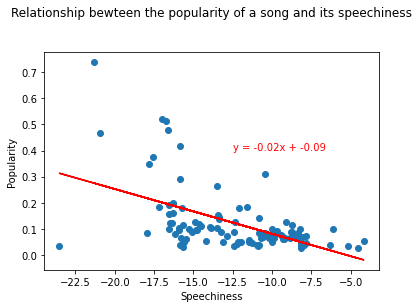

The r squared value is: 0.27658369362306895


In [33]:
#plot regression line for speechiness
x_axis = df_l['Loudness']
y_axis = df_l['Speechiness']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(-12.5, 0.4),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its speechiness\n\n")
plt.ylabel("Popularity")
plt.xlabel("Speechiness")

#save image
plt.savefig("../Images/LowPopularityandspeechiness.png", facecolor = "w",bbox_inches="tight")

plt.show();

print(f'The r squared value is: {rvalue**2}')

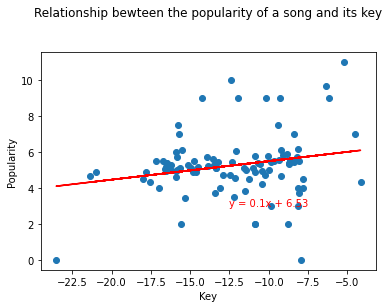

The r squared value is: 0.04891080811757495


In [34]:
#plot regression line for key
x_axis = df_l['Loudness']
y_axis = df_l['Key']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(-12.5, 3),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the popularity of a song and its key\n\n")
plt.ylabel("Popularity")
plt.xlabel("Key")

#save image
plt.savefig("../Images/LowPopularityandkey.png", facecolor = "w",bbox_inches="tight")

plt.show();

print(f'The r squared value is: {rvalue**2}')